In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# x' = f(t,x)
def f(t,x):
    return x - t**2 + 1

def g(t):
    return -0.5*np.exp(t) + t**2 + 2*t + 1

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_euler(N,y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + h*f(t[i-1], w[i-1])
        
    return w,t

[1.         1.18393972 1.43625222]


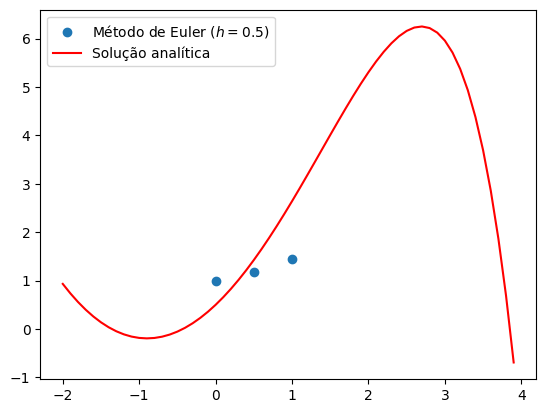

In [23]:
w, t = metodo_de_euler(2, 1, 0, 1)

h = t[1] - t[0]

x = np.arange(-2,4,0.1)
y = g(x)

# for i in range(len(t)):
#     print(f"({t[i]}, {w[i]})")

# print(abs(g(t) - w))

print(w)

plt.scatter(t,w, label=f'Método de Euler ($h = {h}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('metodo_de_euler.pdf')
plt.show()

sol. aproximada ::: [ 0.          0.27182818  0.68475558  1.27697834  2.09354769  3.18744512
  4.62081785  6.46639638  8.80911969 11.74799654 15.39823565]

sol. análitica ::: [ 0.          0.34591988  0.86664254  1.60721508  2.62035955  3.96766629
  5.72096153  7.96387348 10.79362466 14.32308154 18.68309708]

erro ::: [0.         0.07409169 0.18188696 0.33023673 0.52681186 0.78022117
 1.10014368 1.4974771  1.98450497 2.57508499 3.28486143]



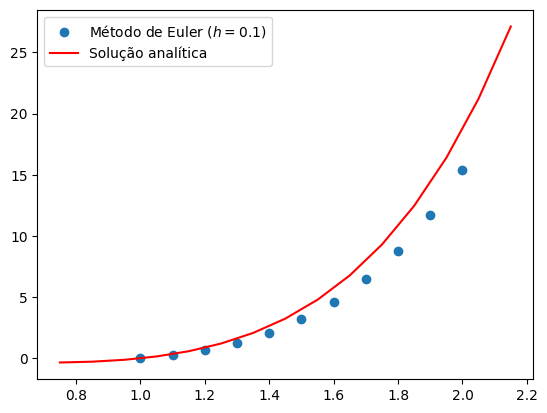

[[ 1.          0.        ]
 [ 1.1         0.27182818]
 [ 1.2         0.68475558]
 [ 1.3         1.27697834]
 [ 1.4         2.09354769]
 [ 1.5         3.18744512]
 [ 1.6         4.62081785]
 [ 1.7         6.46639638]
 [ 1.8         8.80911969]
 [ 1.9        11.74799654]
 [ 2.         15.39823565]]
Solução aproximada para 1.04 ::: 0.10873127313836181
Solução aproximada para 1.55 ::: 3.9041314843692154
Solução aproximada para 1.97 ::: 13.80521034247583
y(1.04) = 0.11998749706134393
y(1.55) = 4.788635020801403
y(1.97) = 17.279298435557664


In [25]:
def f(t,x):
    return 2*(x/t) + np.exp(t)*(t**2)

def g(t):
    return (np.exp(t) - np.exp(1))*(t**2)

w, t = metodo_de_euler(10, 0, 1, 2)

h = t[1] - t[0]

x = np.arange(0.75,2.25,0.1)
y = g(x)

print(f"sol. aproximada ::: {w}", end='\n\n')
print(f"sol. análitica ::: {g(t)}", end='\n\n')
print(f"erro ::: {abs(w - g(t))}", end='\n\n')

plt.scatter(t,w, label=f'Método de Euler ($h = {h:.1f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('q9.pdf')
plt.show()

def neville(A,x):
    X = A[:,0]
    Y = A[:,1]
    
    n = len(A)
    
    B = np.zeros((n,n))
    
    B[:,0] = Y
    
    for i in range(1,n):
        for j in range(1, i + 1):
            B[i,j] = (((x - X[i-j])*B[i,j-1]) - ((x - X[i])*B[i-1,j-1]))/(X[i]-X[i-j])
    
    # for i in range(n):
    #     for j in range(n):
    #         print(f'{B[i,j]:.3f}', end='\t')
    #     print("")
        
    print(f"Solução aproximada para {x} ::: {B[n-1,n-1]}")
    
    
A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w
    
print(A)

neville(A[0:2, :],1.04)
neville(A[5:7, :],1.55)
neville(A[8:10,:],1.97)

print(f"y(1.04) = {g(1.04)}")
print(f"y(1.55) = {g(1.55)}")
print(f"y(1.97) = {g(1.97)}")

In [27]:
def neville(A,x):
    X = A[:,0]
    Y = A[:,1]
    
    n = len(A)
    
    B = np.zeros((n,n))
    
    B[:,0] = Y
    
    for i in range(1,n):
        for j in range(1, i + 1):
            B[i,j] = (((x - X[i-j])*B[i,j-1]) - ((x - X[i])*B[i-1,j-1]))/(X[i]-X[i-j])
    
    # for i in range(n):
    #     for j in range(n):
    #         print(f'{B[i,j]:.3f}', end='\t')
    #     print("")
        
    print(f"Solução aproximada para {x} ::: {B[n-1,n-1]}")
    
    
A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w
    
# print(A)

neville(A[0:2, :],1.04)
neville(A[5:7, :],1.55)
neville(A[8:10,:],1.97)

print("")

print(f"y(1.04) = {g(1.04)}")
print(f"y(1.55) = {g(1.55)}")
print(f"y(1.97) = {g(1.97)}")

Solução aproximada para 1.04 ::: 0.10873127313836181
Solução aproximada para 1.55 ::: 3.9041314843692154
Solução aproximada para 1.97 ::: 13.80521034247583

y(1.04) = 0.11998749706134393
y(1.55) = 4.788635020801403
y(1.97) = 17.279298435557664


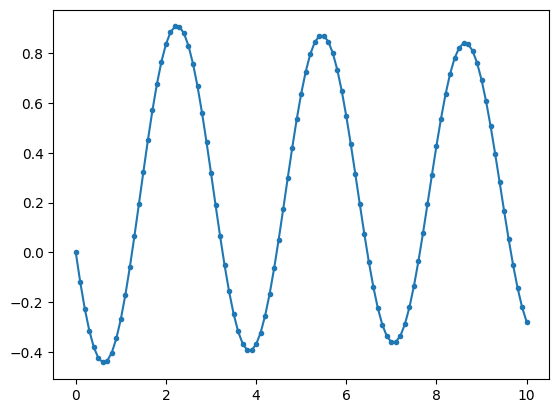

In [15]:
def E(t,x):
    return np.exp(-0.06*np.pi*t)*np.sin(2*t - np.pi)

def dE(t,x):
    return -0.006*np.pi*np.exp(-0.006*np.pi*t)*np.sin(2*t + np.pi) + 2*np.exp(-0.006*np.pi*t)*np.cos(2*t - np.pi)

def d2E(t,x):
    return -0.06*np.pi*np.exp(-0.06*np.pi*t)*(-0.06*np.pi*np.sin(2*t - np.pi) + 2*np.cos(2*t - np.pi)) + np.exp(-0.06*np.pi*t)*(-2*0.06*np.pi*np.cos(2*t - np.pi) - 4*np.sin(2*t - np.pi))

def f(t,x):
    C = 0.3
    R = 1.4
    L = 1.7
    
    return C*d2E(t,x) + (1/R)*dE(t,x) + (1/L)*E(t,x)


w, t = metodo_de_euler(100, 0, 0, 10)

h = t[1] - t[0]

# for i in range(len(t)):
#     print(f"({t[i]:.1f},{w[i]:.3f})")

plt.scatter(t,w, marker='.')
plt.plot(t,w)
plt.savefig('q16.pdf')
plt.show()